In [409]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [410]:
# To import csv file
df = pd.read_csv('https://raw.githubusercontent.com/venkatesh-hegade/Campus_Placement_Prediction/master/train.csv')
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,0,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,0,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,1,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [411]:
# as salary and sl_no columns are not required for placement status prediction so we drop it
df.drop(['salary','sl_no','ssc_b','hsc_b'], axis=1, inplace=True)

In [412]:
df.isnull().sum()

gender            0
ssc_p             0
hsc_p             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

# Label Encoding

In [413]:
encoder = LabelEncoder()

In [414]:
df["degree_t"] = df["degree_t"].astype('category')
df["workex"] = df["workex"].astype('category')
df["specialisation"] = df["specialisation"].astype('category')
df["status"] = df["status"].astype('category')
df["gender"] = df["gender"].astype('category')
df["hsc_s"] = df["hsc_s"].astype('category')
df.dtypes
df["workex"] = df["workex"].cat.codes
df["gender"] = df["gender"].cat.codes
df["degree_t"] = df["degree_t"].cat.codes
df["specialisation"] = df["specialisation"].cat.codes
df["status"] = df["status"].cat.codes
df["hsc_s"] = df["hsc_s"].cat.codes

In [415]:
df.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,91.00,1,58.00,2,0,55.0,1,58.80,1
1,0,79.33,78.33,2,77.48,2,1,86.5,0,66.28,1
2,0,65.00,68.00,0,64.00,0,0,75.0,0,57.80,1
3,0,56.00,52.00,2,52.00,2,0,66.0,1,59.43,0
4,0,85.80,73.60,1,73.30,0,0,96.8,0,55.50,1


In [416]:
df.describe()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.353488,67.303395,66.333163,1.372093,66.370186,0.600000,0.344186,72.100558,0.441860,62.278186,0.688372
std,0.479168,10.827205,10.897509,0.580978,7.358743,0.890238,0.476211,13.275956,0.497767,5.833385,0.464240
min,0.000000,40.890000,37.000000,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000,51.210000,0.000000
25%,0.000000,60.600000,60.900000,1.000000,61.000000,0.000000,0.000000,60.000000,0.000000,57.945000,0.000000
50%,0.000000,67.000000,65.000000,1.000000,66.000000,0.000000,0.000000,71.000000,0.000000,62.000000,1.000000
75%,1.000000,75.700000,73.000000,2.000000,72.000000,2.000000,1.000000,83.500000,1.000000,66.255000,1.000000
max,1.000000,89.400000,97.700000,2.000000,91.000000,2.000000,1.000000,98.000000,1.000000,77.890000,1.000000


# Checking for Outliers
#### An outlier is a data point that is noticeably different from the rest. They represent errors in measurement, bad data collection, or simply show variables not considered when collecting the data.

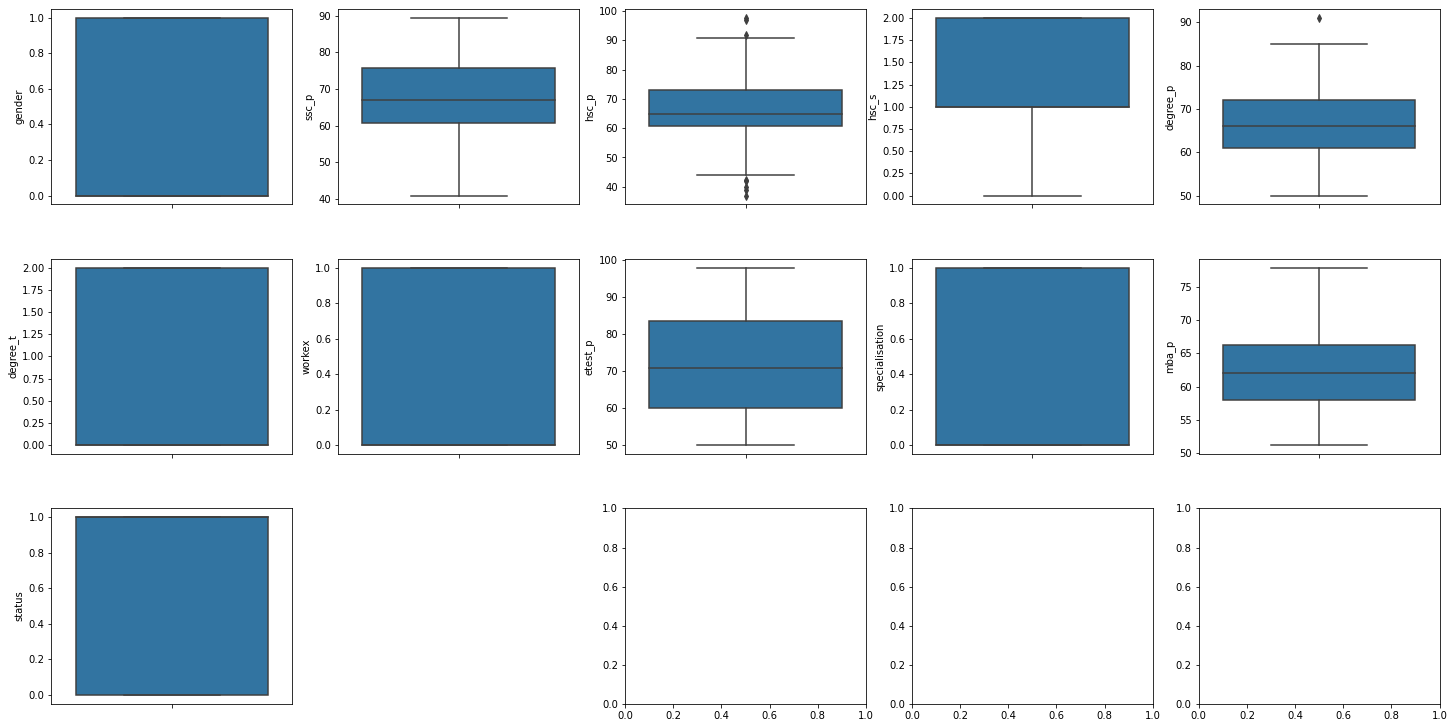

In [417]:
fig, axs = plt.subplots(ncols=5,nrows=3,figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=v, ax=axs[index])
    index+=1

fig.delaxes(axs[index])
plt.tight_layout(pad=0.3, w_pad=0.5,h_pad = 4.5) 

In [418]:
# deleting some outliers in 2 columns degree_p and hsc_p
df = df[~(df['degree_p']>=90)]
df = df[~(df['hsc_p']>=95)]

# Checking For Correlation
#### Correlation plays a vital role in locating the important variables on which other variables depend.

In [419]:
df.corr()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
gender,1.000000,0.059818,0.022187,-0.072116,0.154679,-0.063117,-0.093325,-0.081765,0.103355,0.298466,-0.098189
ssc_p,0.059818,1.000000,0.528111,0.229080,0.528753,0.193851,0.183073,0.264009,-0.177436,0.377438,0.605381
hsc_p,0.022187,0.528111,1.000000,-0.172575,0.443595,-0.095199,0.135144,0.208809,-0.222405,0.335610,0.499777
hsc_s,-0.072116,0.229080,-0.172575,1.000000,0.122510,0.589604,0.019540,0.076214,0.170520,0.027663,0.028882
degree_p,0.154679,0.528753,0.443595,0.122510,1.000000,0.049952,0.135100,0.226353,-0.232618,0.376261,0.479557
degree_t,-0.063117,0.193851,-0.095199,0.589604,0.049952,1.000000,0.123191,0.008704,0.081459,0.099991,-0.028670
workex,-0.093325,0.183073,0.135144,0.019540,0.135100,0.123191,1.000000,0.052862,-0.187200,0.174951,0.279091
etest_p,-0.081765,0.264009,0.208809,0.076214,0.226353,0.008704,0.052862,1.000000,-0.222765,0.203663,0.122770
specialisation,0.103355,-0.177436,-0.222405,0.170520,-0.232618,0.081459,-0.187200,-0.222765,1.000000,-0.100456,-0.251043
mba_p,0.298466,0.377438,0.335610,0.027663,0.376261,0.099991,0.174951,0.203663,-0.100456,1.000000,0.063197


<AxesSubplot:>

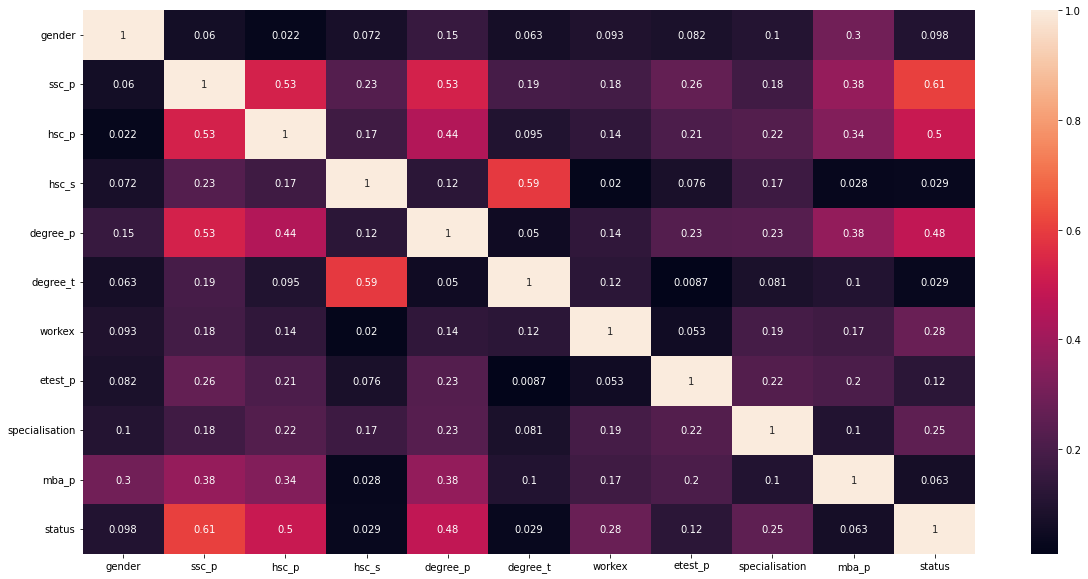

In [420]:
# heatmap for checking correlation or linearity

plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(), annot=True)

In [421]:
df.shape

(212, 11)

C:\Users\venka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\venka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\venka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

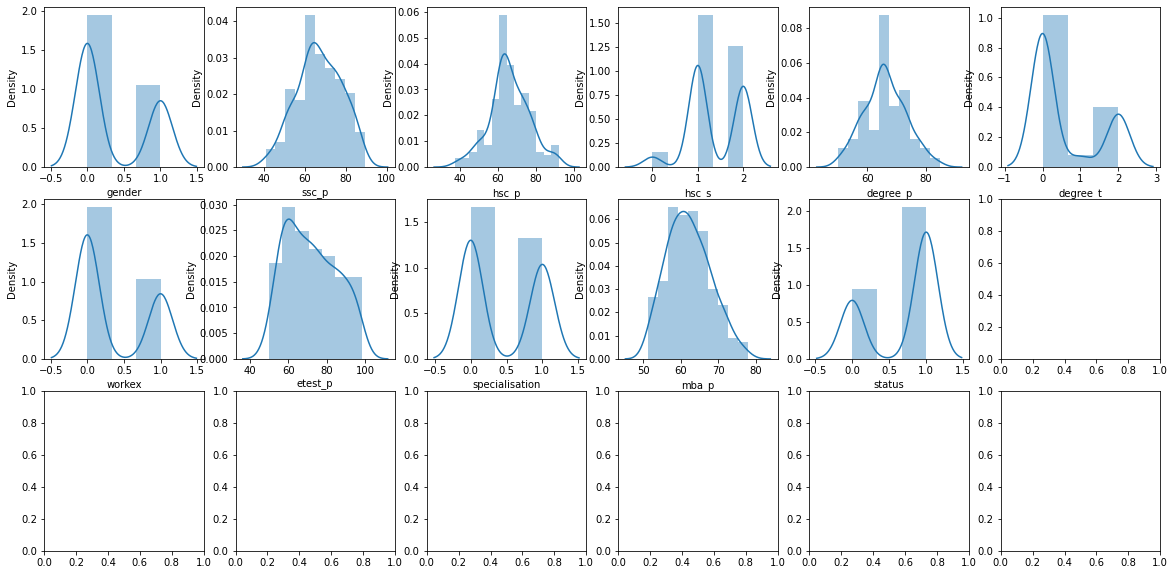

In [422]:
# checking distributions of all features
fig, axs = plt.subplots(ncols=6,nrows=3,figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index+=1

In [423]:
df_class = df.copy()
x = df_class.iloc[:,0:-1].values
y = df_class.iloc[:,-1].values

In [424]:
x

array([[ 0.  , 67.  , 91.  , ..., 55.  ,  1.  , 58.8 ],
       [ 0.  , 79.33, 78.33, ..., 86.5 ,  0.  , 66.28],
       [ 0.  , 65.  , 68.  , ..., 75.  ,  0.  , 57.8 ],
       ...,
       [ 0.  , 67.  , 67.  , ..., 59.  ,  0.  , 69.72],
       [ 1.  , 74.  , 66.  , ..., 70.  ,  1.  , 60.23],
       [ 0.  , 62.  , 58.  , ..., 89.  ,  1.  , 60.22]])

In [425]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int8)

In [426]:
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.18, random_state=0)

In [427]:
sc= StandardScaler()
x_train = sc.fit_transform(x_train) # for standardising the features
x_test = sc.transform(x_test)

In [428]:
log = LogisticRegression()

In [429]:
log.fit(x_train,y_train)

LogisticRegression()

In [430]:
y_pred = log.predict(x_test)

In [431]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int8)

In [432]:
accuracy_score(y_test,y_pred)

0.8974358974358975

In [433]:
log.score(x_train,y_train)

0.8959537572254336

In [434]:
confusion_matrix(y_test,y_pred)

array([[15,  2],
       [ 2, 20]], dtype=int64)

In [435]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        17
           1       0.91      0.91      0.91        22

    accuracy                           0.90        39
   macro avg       0.90      0.90      0.90        39
weighted avg       0.90      0.90      0.90        39



# Naive Bayes Classifier - Gaussian Naive Bayes

In [436]:
nb = GaussianNB()

In [437]:
nb.fit(x_train, y_train)

GaussianNB()

In [438]:
y_pred_nb = nb.predict(x_test)

In [439]:
accuracy_score(y_test, y_pred_nb)

0.8461538461538461

In [440]:
nb.score(x_train, y_train)

0.8497109826589595

In [441]:
confusion_matrix(y_test, y_pred_nb)

array([[13,  4],
       [ 2, 20]], dtype=int64)

In [442]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.83      0.91      0.87        22

    accuracy                           0.85        39
   macro avg       0.85      0.84      0.84        39
weighted avg       0.85      0.85      0.84        39



# SVM Linear Kernal

In [443]:
clf = svm.SVC(kernel="linear")

In [444]:
clf.fit(x_train, y_train)

SVC(kernel='linear')

In [445]:
y_pred_svm = clf.predict(x_test)

In [446]:
accuracy_score(y_test, y_pred_svm)

0.8974358974358975

In [447]:
clf.score(x_train, y_train)

0.8959537572254336

In [448]:
confusion_matrix(y_test, y_pred_svm)

array([[15,  2],
       [ 2, 20]], dtype=int64)

In [449]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        17
           1       0.91      0.91      0.91        22

    accuracy                           0.90        39
   macro avg       0.90      0.90      0.90        39
weighted avg       0.90      0.90      0.90        39



# Naive Bayes - Bernoulli Naive Bayes

In [450]:
bnb = BernoulliNB()

In [451]:
bnb.fit(x_train,y_train)

BernoulliNB()

In [452]:
y_bnb_pred = bnb.predict(x_test)

In [453]:
accuracy_score(y_test,y_bnb_pred)

0.7948717948717948

In [454]:
bnb.score(x_train,y_train)

0.815028901734104

In [455]:
confusion_matrix(y_test, y_bnb_pred)

array([[12,  5],
       [ 3, 19]], dtype=int64)

In [456]:
print(classification_report(y_test,y_bnb_pred))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        17
           1       0.79      0.86      0.83        22

    accuracy                           0.79        39
   macro avg       0.80      0.78      0.79        39
weighted avg       0.80      0.79      0.79        39



# Random Forest

In [457]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)

In [458]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [459]:
y_rf_pred = rf.predict(x_test)

In [460]:
confusion_matrix(y_test,y_rf_pred)

array([[13,  4],
       [ 3, 19]], dtype=int64)

In [461]:
accuracy_score(y_test,y_rf_pred)

0.8205128205128205

In [462]:
print(classification_report(y_test,y_rf_pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79        17
           1       0.83      0.86      0.84        22

    accuracy                           0.82        39
   macro avg       0.82      0.81      0.82        39
weighted avg       0.82      0.82      0.82        39



# KNN Classifier

In [463]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,metric = 'minkowski',p=2)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [464]:
y_knn_pred = knn.predict(x_test)

In [465]:
accuracy_score(y_test,y_knn_pred)

0.7435897435897436

In [466]:
confusion_matrix(y_test,y_knn_pred)

array([[10,  7],
       [ 3, 19]], dtype=int64)

In [467]:
print(classification_report(y_test,y_knn_pred))

              precision    recall  f1-score   support

           0       0.77      0.59      0.67        17
           1       0.73      0.86      0.79        22

    accuracy                           0.74        39
   macro avg       0.75      0.73      0.73        39
weighted avg       0.75      0.74      0.74        39



# XGBOOST

In [468]:
from xgboost import XGBClassifier

In [469]:
xgb = XGBClassifier()

In [470]:
xgb.fit(x_train,y_train)

[01:24:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\venka\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [471]:
xgb.score(x_train,y_train)

1.0

In [472]:
y_xgb_pred = xgb.predict(x_test)

In [473]:
accuracy_score(y_test,y_xgb_pred)

0.8205128205128205

In [474]:
import pickle
# Lets dump our SVM model
pickle.dump(clf, open('svm_model.pkl','wb'))

In [475]:
model = pickle.load(open('svm_model.pkl','rb'))
print(model.predict([[0	,16.00,		12.00,		2,	12.00,	2,	0,	26.0,	1,	59.43]]))


[0]
